<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis


Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0


In [ ]:
!unzip -q /content/twitter-entity-sentiment-analysis.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


data = pd.read_csv('/content/twitter_training.csv', names = ['a', 'b', 'Sentiment', 'Tweet'])
data.head()

,a,b,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
val_data = pd.read_csv('/content/twitter_validation.csv', names = ['a', 'b', 'Sentiment', 'Tweet'])
val_data

,a,b,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
def preprocess_data(data):
    # Drop rows with missing Tweet or Sentiment
    data = data.dropna(subset=['Tweet', 'Sentiment'], axis=0)
    X = data['Tweet']
    y = data['Sentiment']
    return X, y

In [ ]:
X_train, y_train = preprocess_data(data)
X_val, y_val = preprocess_data(val_data)

In [ ]:
def clean_text(text):
    if isinstance(text, str) and len(text.strip()) > 5 and any(c.isalpha() for c in text):
        return True
    return False

X_train = X_train[X_train.apply(clean_text)]
y_train = y_train[X_train.index]

In [ ]:
for i in range(10):
    print(X_train.iloc[i])
    print(y_train.iloc[i])

im getting on borderlands and i will murder you all ,
Positive
I am coming to the borders and I will kill you all,
Positive
im getting on borderlands and i will kill you all,
Positive
im coming on borderlands and i will murder you all,
Positive
im getting on borderlands 2 and i will murder you me all,
Positive
im getting into borderlands and i can murder you all,
Positive
So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
Positive
So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg
Positive
So I spent a few hours doi

In [ ]:
lengths = ([len(t.split()) for t in X_train])

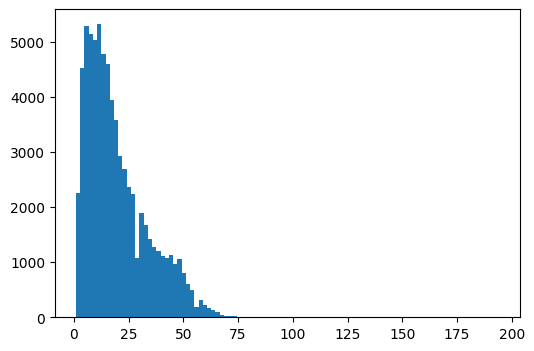

In [ ]:
plt.figure(figsize = (6, 4))
plt.hist(lengths, bins = 100)
plt.show()

In [ ]:
max(lengths)

194

In [ ]:
max_length = int(np.percentile(lengths, 95))
max_length

49

In [ ]:
y_train.value_counts()

,count
Sentiment,
Negative,21739
Positive,19893
Neutral,17592
Irrelevant,12596


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)


In [ ]:
classes =le.classes_
classes

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
len(X_train), len(y_train)

(71820, 71820)

In [ ]:
def to_dataset(X, y):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.batch(32).prefetch(1)
    return ds

train_ds = to_dataset(X_train, y_train_encoded)
val_ds = to_dataset(X_val, y_val_encoded)

In [ ]:
for s in X_train[32:64]:
    print(s)

WE FINISHED BORDERLANDS 3 UPDATE YAS! Thank you for hanging out guys! It was fun. I will try to stream and even if not I might so some IRL streams while awayu. We shall go. Thank you so much for the raids @mompou_mumpow @MegaMagwitch and Hope.
WE FINISHED BORDERLANDS 3 AND FINALLY YAS! Thank you everyone for hanging out everyone! It was fun. I will try to make stream tomorrow but if not I might make so some IRL streams while awayu. 10 We never shall see. Thank you both so... much for the raids @mompou_mumpow or @MegaMagwitch and 4 @KfdMitch.
WE FINISHED BORDERLANDS 3 FINALLY YAS! Hey you for hanging out so! It was fun. I will try that stream tomorrow and if not I might use some IRL streams from awayu. We shall see. Thank you so much how many raids @mompou_mumpow did and their.
Man Gearbox really needs to fix this dissapointing drops in the new Borderlands 3 DLC cant be fine to farm bosses on Mayhem 10 to get 1 legendary drop while anywhere else i get 6-10 drops. . Really sucks alot
Man

In [ ]:
for x, y in train_ds.take(1):
    print(x)
    print(y)

tf.Tensor(
[b'im getting on borderlands and i will murder you all ,'
 b'I am coming to the borders and I will kill you all,'
 b'im getting on borderlands and i will kill you all,'
 b'im coming on borderlands and i will murder you all,'
 b'im getting on borderlands 2 and i will murder you me all,'
 b'im getting into borderlands and i can murder you all,'
 b"So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg"
 b"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg"
 b"So I spent a few hours doing something for fun... If

In [ ]:
vocab_size = 10000

text_vec_layer = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    standardize="lower_and_strip_punctuation",
    split='whitespace',
    output_sequence_length=max_length  # Enforce fixed length
)

text_vec_layer.adapt(train_ds.map(lambda X, y: X))

In [ ]:
for x, y in train_ds.take(1):
    print(text_vec_layer(x))
    print(y)

tf.Tensor(
[[ 40 161  14 ...   0   0   0]
 [  3 111 395 ...   0   0   0]
 [ 40 161  14 ...   0   0   0]
 ...
 [ 38 550 130 ...   0   0   0]
 [ 38 234 234 ...   0   0   0]
 [139  13   9 ...   0   0   0]], shape=(32, 49), dtype=int64)
tf.Tensor([3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 3 3 3], shape=(32,), dtype=int64)


In [ ]:
text_vec_layer(['hey how it is going a a'])

<tf.Tensor: shape=(1, 49), dtype=int64, numpy=
array([[312,  62,  12,   8, 109,   6,   6,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [ ]:
embed_size = 128

model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_size, mask_zero = True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4762 - loss: 1.2112 - val_accuracy: 0.5690 - val_loss: 1.1201
Epoch 2/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6173 - loss: 0.9552 - val_accuracy: 0.7100 - val_loss: 0.8234
Epoch 3/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7250 - loss: 0.7097 - val_accuracy: 0.7780 - val_loss: 0.6218
Epoch 4/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8170 - loss: 0.4966 - val_accuracy: 0.8110 - val_loss: 0.5443
Epoch 5/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8777 - loss: 0.3461 - val_accuracy: 0.8430 - val_loss: 0.4567
Epoch 6/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9105 - loss: 0.2595 - val_accuracy: 0.8600 - val_loss: 0.4321
Epoch 7/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9285 - loss: 0.2050 - val_accuracy: 0.8880 - val_loss: 0.3789
Epoch 8/10
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9401 - loss: 0

In [ ]:
def predict_sentiment(tweet):
    tweet = tf.constant([tweet])
    pred = model.predict(tweet)
    print(pred.round(2))
    return classes[np.argmax(pred)]

predict_sentiment('im getting on borderlands and i will kill you all,')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.   0.01 0.   0.99]]


'Positive'

In [ ]:
X_train[2], y_train[2]

('im getting on borderlands and i will kill you all,', 'Positive')

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 121.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Cats are running faster than dogs")

print([token.lemma_ for token in doc])



['cat', 'be', 'run', 'fast', 'than', 'dog']


In [ ]:
import spacy
import pandas as pd

# Load the spaCy English pipeline once
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Faster by disabling unused components

def lemmatize_text_spacy(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.is_alpha])  # remove punctuation, numbers, etc.


In [ ]:
# Apply lemmatization efficiently using pandas .apply()
X_train_lemmatized = X_train.apply(lemmatize_text_spacy)
X_val_lemmatized = X_val.apply(lemmatize_text_spacy)


In [ ]:
X_train

,Tweet
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [ ]:
X_train_lemmatized

,Tweet
0,I m get on borderland and I will murder you all
1,I be come to the border and I will kill you all
2,I m get on borderland and I will kill you all
3,I m come on borderland and I will murder you all
4,I m get on borderland and I will murder you I all
...,...
74677,just realize that the Windows partition of my ...
74678,just realize that my Mac window partition be y...
74679,just realize the window partition of my Mac be...
74680,just realize between the window partition of m...


In [ ]:
import tensorflow as tf

# Convert Series to tf.data.Dataset
train_text_ds = tf.data.Dataset.from_tensor_slices(X_train_lemmatized).batch(32)

# Set vectorization parameters
text_vec_layer = tf.keras.layers.TextVectorization(
    max_tokens=1000,
    output_mode="int",
    output_sequence_length=50
)

# Build the vocabulary
text_vec_layer.adapt(train_text_ds)


In [ ]:
# Reuse label-encoded y_train_encoded and y_val_encoded

def to_dataset(X, y):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.batch(32).prefetch(1)
    return ds

train_ds = to_dataset(X_train_lemmatized, y_train_encoded)
val_ds = to_dataset(X_val_lemmatized, y_val_encoded)


In [ ]:
embed_size = 128

model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(input_dim=1000, output_dim=embed_size, mask_zero=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_ds.take(100), validation_data=val_ds, epochs=3)


Epoch 1/3
 36/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3436 - loss: 1.3524

InvalidArgumentError: Graph execution error:

Detected at node sequential_20_1/gru_17_1/Assert/Assert defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-227-49c5ec7f4d74>", line 12, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 57, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/gru.py", line 602, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 402, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/gru.py", line 569, in inner_loop

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 484, in gru

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 682, in _cudnn_gru

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 557, in _assert_valid_mask

assertion failed: [You are passing a RNN mask that does not correspond to right-padded sequences, while using cuDNN, which is not supported. With cuDNN, RNN masks can only be used for right-padding, e.g. `[[True, True, False, False]]` would be a valid mask, but any mask that isn\'t just contiguous `True`\'s on the left and contiguous `False`\'s on the right would be invalid. You can pass `use_cudnn=False` to your RNN layer to stop using cuDNN (this may be slower).]
	 [[{{node sequential_20_1/gru_17_1/Assert/Assert}}]] [Op:__inference_multi_step_on_iterator_2158547]